In [1]:
import atexit
import copy
import gym
import json
from kaggle_environments import make
import math
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import random
from scipy.stats import rankdata
from subprocess import Popen, PIPE
import sys
import tqdm
from typing import *

#from lux_ai.lux.game import Game
#from lux_ai.lux_gym.lux_env import LuxEnv
#from lux_ai.rl_agent.rl_agent import RLAgent

env = make("lux_ai_2021")
SEED_COUNTER = 0

Loading environment football failed: No module named 'gfootball'


In [5]:
class Test:
    a = ["A", "b"]
    b = {val: i for i, val in enumerate(a)}

In [14]:
mu_1 = 27.483
mu_2 = 22.427
BETA = 4. + 1. / 6.

def win_probability(mu_1, mu_2):
    exp = (mu_1 - mu_2) / BETA
    n = 4. ** exp
    return n / (n + 1)

win_probability(mu_1, mu_2)

0.8431936483048026

In [8]:
from lux_ai.handcrafted_agents.needs_name_v0 import Agent

agent = Agent(env.steps[0][0]["observation"], env.configuration)
turn = 214
agent.set_to_turn(env.steps[turn][0]["observation"], env.configuration, turn)
agent(env.steps[turn + 1][0]["observation"], env.configuration);

['m u_5 n', "dst 'Turn: 215'", "dt 9 6 'MineFuelLocal_0/5:_0' 16"]

In [9]:
agent.worker_actions

{Unit: team_0/type_0/pos_(9, 6): [Action(actor=Unit: team_0/type_0/pos_(9, 6), action_str='m u_5 n', debug_strs="dt 9 6 'MineFuelLocal_0/5:_0' 16"),
  Action(actor=Unit: team_0/type_0/pos_(9, 6), action_str='m u_5 e', debug_strs="dt 9 6 'MineFuelLocal_1/5:_0' 16"),
  Action(actor=Unit: team_0/type_0/pos_(9, 6), action_str='m u_5 s', debug_strs="dt 9 6 'MineFuelLocal_2/5:_0' 16"),
  Action(actor=Unit: team_0/type_0/pos_(9, 6), action_str='m u_5 w', debug_strs="dt 9 6 'MineFuelLocal_3/5:_0' 16"),
  Action(actor=Unit: team_0/type_0/pos_(9, 6), action_str='m u_5 c', debug_strs="dt 9 6 'MineFuelLocal_4/5:_0' 16")]}

In [6]:

for i, mat in enumerate(agent.smoothed_fps_mats):
    #plt.imshow(mat + agent.my_mobile_units_mat * mat.max() + agent.my_cities_mat * mat.max())
    plt.imshow(mat)
    plt.colorbar()
    plt.show();

AttributeError: 'Agent' object has no attribute 'smoothed_frps_mats'

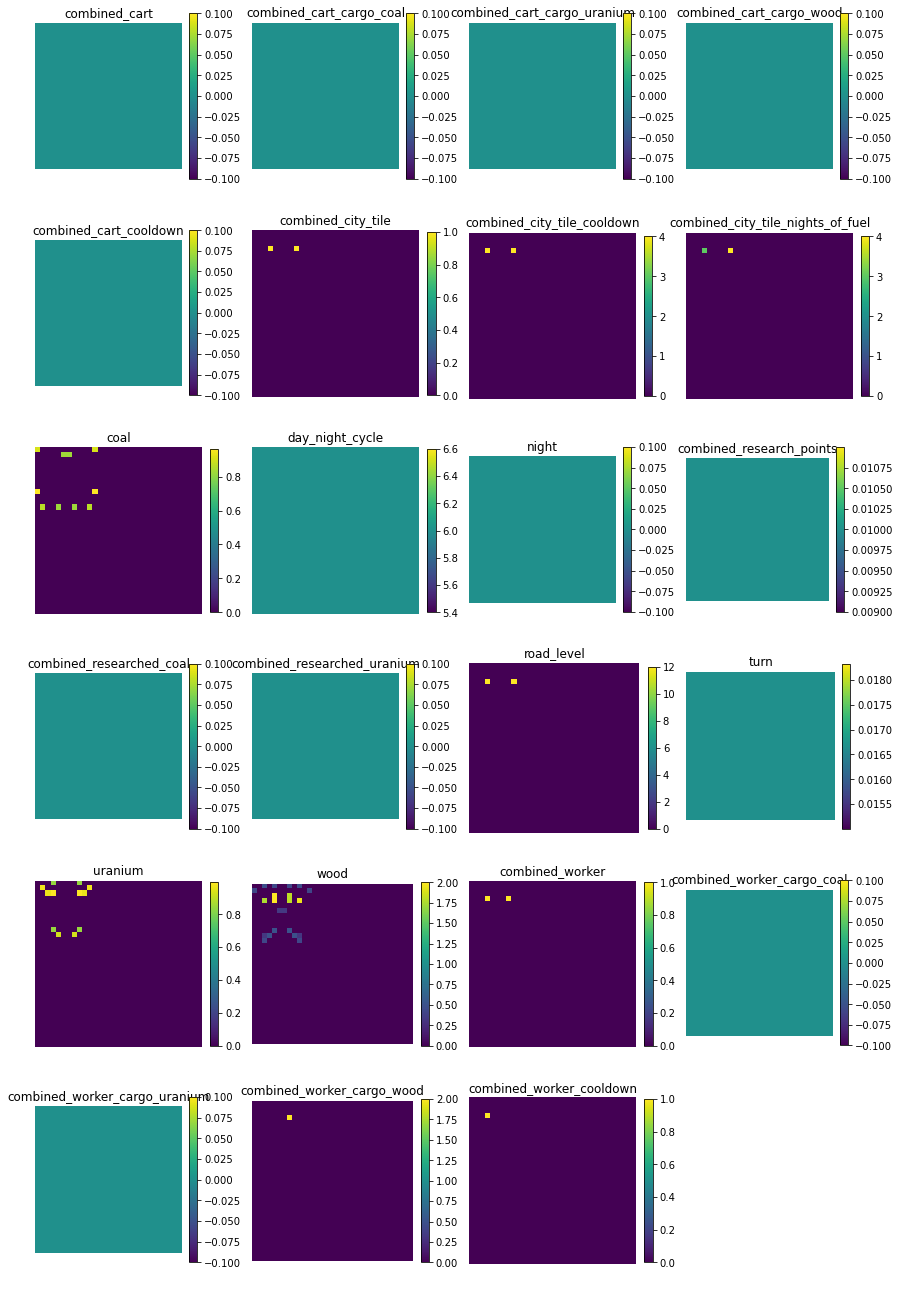

In [5]:
rl_agent = RLAgent(env.steps[0][0]["observation"], env.configuration)
turn = 6
rl_agent.set_to_turn(env.steps[turn][0]["observation"], env.configuration, turn)
obs = rl_agent.get_env_output()["obs"]

n = len(obs)
width = 4
height = math.ceil(n / width)
fig = plt.figure(constrained_layout=True, figsize=(3 * width, 3 * height))
subfigs = fig.subfigures(height, width).ravel()
cmap = "viridis"

for subfig_idx, (name, tensor) in enumerate(obs.items()):
    tensor = tensor.cpu()
    while len(tensor.shape) < 5:
        tensor = tensor.unsqueeze(-1)
    assert tensor.shape[0] == 1
    assert tensor.shape[1] == 1
    tensor = tensor[0, 0]
    tensor = tensor.expand(-1, 32, 32).clone()
    if tensor.shape[0] == 1:
        tensor = tensor[0]
    elif tensor.shape[0] == 2:
        #tensor[1] *= -1
        tensor = tensor.sum(dim=0)
        name = f"combined_{name}"
    else:
        raise ValueError(f"More than 2 players: {tensor.shape}")
    axes = subfigs[subfig_idx].subplots(1, 1)
    ax = axes
    #mappable = ax.imshow(tensor.numpy().T, cmap=cmap, norm=colors.LogNorm(vmin=1e-8, vmax=tensor.max().item() + 1.))
    mappable = ax.imshow(tensor.numpy().T, cmap=cmap)
    ax.set_title(name)
    ax.axis("off")
    subfigs[subfig_idx].colorbar(mappable, shrink=0.8)
    """
    for i in range(tensor.shape[0]):
        for j in range(tensor.shape[1]):
            ax = axes[i, j]
       """     